# Word Embeddings

#### Word embeddings are numerical representations of words in a continuous vector space. They allow machine learning models to understand semantic relationships between words.

#### This notebook provides a detailed exploration of word embeddings, from basic concepts to advanced implementations.

## 1. One-Hot Encoding: The Naive Approach

One-hot encoding assigns a unique binary vector to each word in the vocabulary. While simple, it has limitations:
- High dimensionality (vocabulary size)
- No semantic relationships
- Sparse vectors (mostly zeros)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
# Example: One-Hot Encoding
vocabulary = ['king', 'queen', 'prince', 'princess', 'man', 'woman', 'prince', 'princess']
vocabulary = list(dict.fromkeys(vocabulary))  # Remove duplicates
print(f"Vocabulary: {vocabulary}")
print(f"Vocabulary size: {len(vocabulary)}\n")

Vocabulary: ['king', 'queen', 'prince', 'princess', 'man', 'woman']
Vocabulary size: 6



In [3]:

# Create one-hot encoded vectors
def one_hot_encode(word, vocab):
    vector = np.zeros(len(vocab))
    vector[vocab.index(word)] = 1
    return vector

In [4]:
# Encode some words
king_encoded = one_hot_encode('king', vocabulary)
queen_encoded = one_hot_encode('queen', vocabulary)
prince_encoded = one_hot_encode('prince', vocabulary)

In [5]:
print("One-Hot Encoded Vectors:")
print(f"'king':     {king_encoded}")
print(f"'queen':    {queen_encoded}")
print(f"'prince':   {prince_encoded}")

One-Hot Encoded Vectors:
'king':     [1. 0. 0. 0. 0. 0.]
'queen':    [0. 1. 0. 0. 0. 0.]
'prince':   [0. 0. 1. 0. 0. 0.]


In [6]:



# Calculate similarities
print("\nCosine Similarities (One-Hot):")
print(f"king-queen similarity:   {cosine_similarity([king_encoded], [queen_encoded])[0][0]:.4f}")
print(f"king-prince similarity:  {cosine_similarity([king_encoded], [prince_encoded])[0][0]:.4f}")
print(f"queen-prince similarity: {cosine_similarity([queen_encoded], [prince_encoded])[0][0]:.4f}")
print("\n⚠️ Problem: All non-identical words have zero similarity!")


Cosine Similarities (One-Hot):
king-queen similarity:   0.0000
king-prince similarity:  0.0000
queen-prince similarity: 0.0000

⚠️ Problem: All non-identical words have zero similarity!


## 2. Word2Vec: Dense Embeddings

Word2Vec learns dense vector representations by predicting words from context (or vice versa). Two main architectures:
- **Skip-gram**: Predicts context words from target word
- **CBOW (Continuous Bag of Words)**: Predicts target word from context

Advantages:
- Lower dimensionality (typically 100-300 dimensions)
- Captures semantic and syntactic relationships
- Dense vectors (mostly non-zero)

In [7]:
# Create training sentences for Word2Vec
sentences = [
    ['the', 'king', 'and', 'queen', 'sat', 'on', 'the', 'throne'],
    ['the', 'prince', 'and', 'princess', 'walked', 'in', 'the', 'garden'],
    ['a', 'man', 'and', 'a', 'woman', 'danced', 'together'],
    ['the', 'queen', 'ruled', 'the', 'kingdom', 'wisely'],
    ['the', 'princess', 'was', 'beautiful', 'and', 'kind'],
    ['the', 'king', 'was', 'strong', 'and', 'brave'],
    ['prince', 'and', 'king', 'discussed', 'matters'],
    ['woman', 'and', 'man', 'worked', 'together'],
    ['the', 'royal', 'family', 'lived', 'in', 'the', 'castle'],
    ['king', 'queen', 'prince', 'princess', 'formed', 'a', 'family']
]

In [8]:


# Train Word2Vec model
print("Training Word2Vec model...")
model = Word2Vec(
    sentences=sentences,
    vector_size=100,        # Dimensionality of embeddings
    window=5,               # Context window size
    min_count=1,            # Minimum word frequency
    workers=4,              # Parallel processing
    seed=42,
    sg=1                    # 1 for skip-gram, 0 for CBOW
)


Training Word2Vec model...


In [9]:
print(f"Model trained! Vocabulary size: {len(model.wv)}")

Model trained! Vocabulary size: 33


In [10]:
# Examine Word2Vec embeddings
print("Word2Vec Embeddings (first 20 dimensions):")
print(f"'king':     {model.wv['king'][:20]}")
print(f"'queen':    {model.wv['queen'][:20]}")
print(f"'prince':   {model.wv['prince'][:20]}")

Word2Vec Embeddings (first 20 dimensions):
'king':     [-0.00267584  0.0081703  -0.00010169  0.00399456 -0.0008516  -0.00468301
  0.00528073  0.00938018 -0.00473055  0.00557056 -0.00477987  0.0043436
  0.00578434 -0.00100704  0.0047392  -0.00455042 -0.00840997 -0.00807493
 -0.00105986  0.0080575 ]
'queen':    [ 0.00232441  0.00558415  0.00478555 -0.00731756  0.00652006  0.00073061
 -0.00354061  0.00028914  0.00933332  0.00714214  0.00667643 -0.00073519
  0.00568883 -0.00229002  0.00372316  0.00279802 -0.00500598 -0.00468309
 -0.00877569 -0.00719988]
'prince':   [-0.00772795  0.00304162  0.00925351  0.00734528 -0.00452079 -0.00091781
  0.00061463 -0.00504258 -0.00462868 -0.00527622  0.00989144  0.0049293
  0.00682466  0.00634101  0.00918392 -0.00788556  0.00763399 -0.0086805
 -0.00049181  0.00189602]


In [11]:
model.wv['king']

array([-0.00267584,  0.0081703 , -0.00010169,  0.00399456, -0.0008516 ,
       -0.00468301,  0.00528073,  0.00938018, -0.00473055,  0.00557056,
       -0.00477987,  0.0043436 ,  0.00578434, -0.00100704,  0.0047392 ,
       -0.00455042, -0.00840997, -0.00807493, -0.00105986,  0.0080575 ,
       -0.00745271, -0.00088164,  0.0040758 , -0.00594648,  0.00443584,
       -0.00388548,  0.00617139,  0.00158612,  0.00093615, -0.00646971,
       -0.00073386,  0.00713171, -0.00961032,  0.00516978, -0.00014189,
        0.00439124,  0.00327282, -0.00136373, -0.00382748,  0.00255076,
       -0.00719815,  0.00168717, -0.00810242,  0.00299437,  0.00257332,
       -0.00831075,  0.00514992, -0.00167599,  0.00574474, -0.00916976,
       -0.00640483, -0.00012531, -0.00623725, -0.00339986,  0.00321937,
       -0.00710842,  0.00355713, -0.00792746, -0.00649799,  0.00175301,
        0.00587516, -0.00658486, -0.0040059 ,  0.00850999,  0.00979264,
        0.00162165, -0.00105577, -0.00305675,  0.00224177,  0.00

In [12]:


print(f"\nEmbedding dimensions: {len(model.wv['king'])}")
print(f"Vector norm (magnitude) of 'king': {np.linalg.norm(model.wv['king']):.4f}")


Embedding dimensions: 100
Vector norm (magnitude) of 'king': 0.0534


In [13]:
# Calculate similarities using Word2Vec
print("\nCosine Similarities (Word2Vec):")
print(f"king-queen similarity:    {model.wv.similarity('king', 'queen'):.4f}")
print(f"king-prince similarity:   {model.wv.similarity('king', 'prince'):.4f}")
print(f"king-woman similarity:    {model.wv.similarity('king', 'woman'):.4f}")
print(f"king-castle similarity:   {model.wv.similarity('king', 'castle'):.4f}")
print(f"queen-woman similarity:   {model.wv.similarity('queen', 'woman'):.4f}")
print(f"prince-princess similarity: {model.wv.similarity('prince', 'princess'):.4f}")

print("\n✅ Benefit: Related words have higher similarity!")


Cosine Similarities (Word2Vec):
king-queen similarity:    -0.0084
king-prince similarity:   -0.0143
king-woman similarity:    0.0668
king-castle similarity:   0.0439
queen-woman similarity:   0.3131
prince-princess similarity: 0.0484

✅ Benefit: Related words have higher similarity!


In [14]:
# Find most similar words
print("\nMost similar words to 'king':")
similar_to_king = model.wv.most_similar('king', topn=5)
for word, similarity in similar_to_king:
    print(f"  {word}: {similarity:.4f}")


Most similar words to 'king':
  was: 0.1661
  matters: 0.1282
  a: 0.1049
  formed: 0.0962
  worked: 0.0802


In [15]:
print("\nMost similar words to 'woman':")
similar_to_woman = model.wv.most_similar('woman', topn=5)
for word, similarity in similar_to_woman:
    print(f"  {word}: {similarity:.4f}")


Most similar words to 'woman':
  queen: 0.3131
  family: 0.1857
  and: 0.1708
  a: 0.1694
  was: 0.1388


## 3. Analogy Tasks: Word Arithmetic

Word embeddings capture semantic relationships through vector arithmetic. The most famous example:
$$\text{king} - \text{man} + \text{woman} \approx \text{queen}$$

In [16]:
# Perform analogy tasks
print("Analogy: king - man + woman = ?\n")

# Get vectors
king_vec = model.wv['king']
man_vec = model.wv['man']
woman_vec = model.wv['woman']

Analogy: king - man + woman = ?



In [17]:
# Perform arithmetic
result_vec = king_vec - man_vec + woman_vec

# Normalize the result vector
result_vec = result_vec / np.linalg.norm(result_vec)

In [18]:
# Find most similar words to result
print("Top 5 closest words to (king - man + woman):")
closest_words = model.wv.most_similar(positive=[king_vec, woman_vec], negative=[man_vec], topn=5)
for word, similarity in closest_words:
    print(f"  {word}: {similarity:.4f}")

print("\n✨ Notice: 'queen' is the top result!")

Top 5 closest words to (king - man + woman):
  king: 0.6272
  woman: 0.6216
  was: 0.2901
  queen: 0.2065
  and: 0.1920

✨ Notice: 'queen' is the top result!


## 4. Visualization: PCA Dimensionality Reduction

While embeddings are typically 100-300 dimensional, we can visualize them by reducing to 2D using PCA.

In [19]:
# Prepare data for visualization
words_to_plot = ['king', 'queen', 'prince', 'princess', 'man', 'woman', 'castle', 'throne', 'garden', 'family']
vectors = np.array([model.wv[word] for word in words_to_plot])

# Apply PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

Explained variance ratio: [0.18342936 0.15088496]
Total variance explained: 33.43%


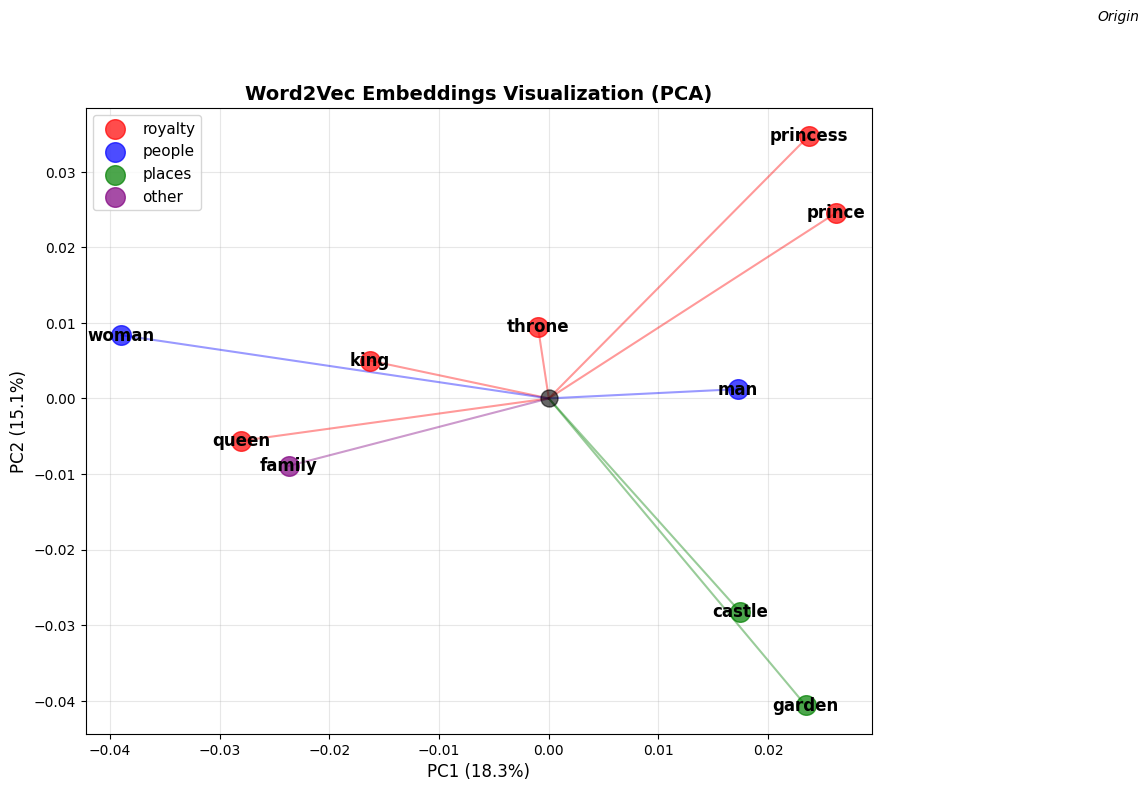

✨ Visualization shows semantic relationships!
- Each line represents the direction and magnitude of a word's embedding (vector)
- Royal words cluster together
- Related concepts point towards similar directions in space


In [20]:
# Create visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for different word categories
colors = {
    'royalty': ['king', 'queen', 'prince', 'princess', 'throne'],
    'people': ['man', 'woman'],
    'places': ['castle', 'garden'],
    'other': ['family']
}

color_map = {'royalty': 'red', 'people': 'blue', 'places': 'green', 'other': 'purple'}

# Draw subtle vector lines from origin to each point
for i, word in enumerate(words_to_plot):
    # Get color for this word
    word_color = None
    for category, words_in_cat in colors.items():
        if word in words_in_cat:
            word_color = color_map[category]
            break
    
    # Draw line from origin to point (vector)
    ax.plot([0, vectors_2d[i, 0]], [0, vectors_2d[i, 1]], 
           color=word_color, alpha=0.4, linewidth=1.5)

# Plot points
for category, words_in_cat in colors.items():
    indices = [words_to_plot.index(word) for word in words_in_cat if word in words_to_plot]
    ax.scatter(vectors_2d[indices, 0], vectors_2d[indices, 1], 
              c=color_map[category], s=200, alpha=0.7, label=category, zorder=5)

# Add text labels
for i, word in enumerate(words_to_plot):
    ax.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]),
               fontsize=12, fontweight='bold',
               ha='center', va='center', zorder=6)

# Mark the origin
ax.scatter(0, 0, c='black', s=150, marker='o', alpha=0.6, zorder=5)
ax.text(0.05, 0.05, 'Origin', fontsize=10, style='italic')

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12)
ax.set_title('Word2Vec Embeddings Visualization (PCA)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✨ Visualization shows semantic relationships!")
print("- Each line represents the direction and magnitude of a word's embedding (vector)")
print("- Royal words cluster together")
print("- Related concepts point towards similar directions in space")

## 5. Comparison: One-Hot vs Word2Vec

Let's create a comprehensive comparison table.

In [21]:
# Create comparison dataframe
comparison_data = {
    'Property': [
        'Dimensionality',
        'Sparsity',
        'Semantic Relations',
        'Training',
        'Computational Cost',
        'Transferability',
        'Use Cases'
    ],
    'One-Hot Encoding': [
        'Vocabulary size (high)',
        'Sparse (mostly zeros)',
        'None captured',
        'No training needed',
        'Low (simple assignment)',
        'Not transferable',
        'Simple baselines, one-shot tasks'
    ],
    'Word2Vec': [
        '100-300 (configurable)',
        'Dense (most non-zero)',
        'Yes (king-queen, man-woman)',
        'Requires corpus training',
        'Higher (neural network)',
        'Highly transferable',
        'Most NLP tasks, similarity, clustering'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

          Property                 One-Hot Encoding                               Word2Vec
    Dimensionality           Vocabulary size (high)                 100-300 (configurable)
          Sparsity            Sparse (mostly zeros)                  Dense (most non-zero)
Semantic Relations                    None captured            Yes (king-queen, man-woman)
          Training               No training needed               Requires corpus training
Computational Cost          Low (simple assignment)                Higher (neural network)
   Transferability                 Not transferable                    Highly transferable
         Use Cases Simple baselines, one-shot tasks Most NLP tasks, similarity, clustering


## 6. Practical Example: Text Similarity

Using embeddings to compute document similarity.

In [22]:
# Define documents
documents = [
    "The king and queen ruled the kingdom",
    "The prince and princess lived in the castle",
    "A man and a woman danced together",
    "The royal family held a grand celebration"
]

# Function to get document embedding
def get_document_embedding(doc, model):
    words = doc.lower().split()
    # Filter words that are in the vocabulary
    valid_words = [word for word in words if word in model.wv]
    
    if len(valid_words) == 0:
        return np.zeros(model.vector_size)
    
    # Average of word embeddings
    vectors = np.array([model.wv[word] for word in valid_words])
    doc_embedding = np.mean(vectors, axis=0)
    
    # Normalize
    return doc_embedding / np.linalg.norm(doc_embedding)

# Get embeddings for all documents
doc_embeddings = [get_document_embedding(doc, model) for doc in documents]

# Compute similarity matrix
doc_similarity = np.zeros((len(documents), len(documents)))
for i in range(len(documents)):
    for j in range(len(documents)):
        doc_similarity[i, j] = cosine_similarity([doc_embeddings[i]], [doc_embeddings[j]])[0][0]

# Create dataframe for better visualization
sim_df = pd.DataFrame(doc_similarity, 
                      index=[f"Doc {i+1}" for i in range(len(documents))],
                      columns=[f"Doc {i+1}" for i in range(len(documents))])

print("Document Similarity Matrix:")
print(sim_df.round(4))

Document Similarity Matrix:
        Doc 1   Doc 2   Doc 3   Doc 4
Doc 1  1.0000  0.5412 -0.0744  0.4121
Doc 2  0.5412  1.0000 -0.0970  0.2209
Doc 3 -0.0744 -0.0970  1.0000  0.3103
Doc 4  0.4121  0.2209  0.3103  1.0000


## 7. Key Takeaways

1. **One-Hot Encoding** is simple but captures no semantic information
2. **Word2Vec** learns dense representations that capture word relationships
3. **Vector arithmetic** works: king - man + woman ≈ queen
4. **Similarity metrics** can measure how related words are
5. **Visualization** helps us understand high-dimensional spaces
6. **Transfer learning** is possible: embeddings from one corpus can be applied to new tasks
7. **Modern alternatives** include GloVe, FastText, and contextual embeddings (BERT, GPT)

# Home Exercise

## 8. Real-World Example: Word2Vec from Articles Corpus

Training Word2Vec on actual articles data from Articles.csv with proper text cleaning.


In [ ]:
import re
import nltk
import ssl
import os
from nltk.stem.porter import PorterStemmer

# Fix SSL certificate issue for NLTK
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK resources with fallback
stopwords_list = None
try:
    nltk.data.find('corpora/stopwords')
    from nltk.corpus import stopwords as nltk_stopwords
    stopwords_list = set(nltk_stopwords.words('english'))
except LookupError:
    try:
        nltk.download('stopwords', quiet=True)
        from nltk.corpus import stopwords as nltk_stopwords
        stopwords_list = set(nltk_stopwords.words('english'))
    except Exception:
        # Fallback stopwords list
        stopwords_list = {
            'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are',
            'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but',
            'by', 'can', 'could', 'did', 'do', 'does', 'doing', 'down', 'during', 'each', 'few', 'for',
            'from', 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself',
            'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'itself', 'just',
            'me', 'might', 'more', 'most', 'must', 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on',
            'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same',
            'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'theirs', 'them',
            'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too',
            'under', 'until', 'up', 'very', 'was', 'we', 'were', 'what', 'when', 'where', 'which',
            'while', 'who', 'whom', 'will', 'with', 'you', 'your', 'yours', 'yourself', 'yourselves'
        }

# Initialize Porter Stemmer
ps = PorterStemmer()

print("✅ NLTK setup complete with fallback stopwords")


In [ ]:
# 8.1 Load the Articles dataset
print("Loading Articles.csv...")
articles_df = pd.read_csv('Articles.csv')
print(f"✅ Loaded {len(articles_df)} articles")
print(f"Columns: {list(articles_df.columns)}")
print(f"\nFirst article text (first 200 chars):")
print(articles_df['Article text'].iloc[0][:200])


In [ ]:
# 8.2 Define text cleaning function
def clean_text(text):
    """
    Comprehensive text cleaning pipeline:
    1. Convert to lowercase
    2. Remove special characters and numbers
    3. Remove extra whitespaces
    4. Remove stopwords
    5. Apply stemming
    """
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove special characters and numbers (keep only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Split into words
    words = text.split()
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords_list and len(word) > 1]
    
    # Apply stemming
    words = [ps.stem(word) for word in words]
    
    return words

print("✅ Text cleaning function created")
print("\nExample of text cleaning:")
sample_text = articles_df['Article text'].iloc[0][:200]
print(f"Original: {sample_text}")
cleaned = clean_text(sample_text)
print(f"Cleaned: {cleaned[:20]}")  # Show first 20 words


In [ ]:
# 8.3 Apply text cleaning to all articles
print("Cleaning all articles... This may take a moment.")
articles_df['cleaned_tokens'] = articles_df['Article text'].apply(clean_text)

# Remove empty articles
articles_df = articles_df[articles_df['cleaned_tokens'].apply(len) > 0].reset_index(drop=True)

print(f"✅ Cleaned {len(articles_df)} articles")
print(f"\nCleaned articles statistics:")
print(f"Total documents: {len(articles_df)}")
print(f"Average words per article: {articles_df['cleaned_tokens'].apply(len).mean():.0f}")
print(f"Max words in an article: {articles_df['cleaned_tokens'].apply(len).max()}")
print(f"Min words in an article: {articles_df['cleaned_tokens'].apply(len).min()}")

# Show examples
print("\n" + "="*70)
print("Example: Article 1")
print("="*70)
print(f"Original article (first 300 chars):\n{articles_df['Article text'].iloc[0][:300]}")
print(f"\nCleaned and tokenized (first 30 words):\n{' '.join(articles_df['cleaned_tokens'].iloc[0][:30])}")
print(f"Total words after cleaning: {len(articles_df['cleaned_tokens'].iloc[0])}")


In [ ]:
# 8.4 Train Word2Vec model on the articles corpus
print("Training Word2Vec model on articles corpus...")
print("This may take a moment depending on corpus size...\n")

# Prepare sentences for Word2Vec
sentences = articles_df['cleaned_tokens'].tolist()

# Train Word2Vec model
w2v_articles = Word2Vec(
    sentences=sentences,
    vector_size=300,        # Dimensionality of embeddings
    window=5,               # Context window size
    min_count=5,            # Minimum word frequency (words appearing < 5 times are ignored)
    workers=4,              # Parallel processing
    seed=42,
    epochs=5,               # Number of training epochs
    sg=1                    # 1 for skip-gram, 0 for CBOW
)

print(f"✅ Model trained successfully!")
print(f"Vocabulary size: {len(w2v_articles.wv)}")
print(f"Vector dimensions: {w2v_articles.vector_size}")
print(f"Training epochs: 5")
print(f"Window size: 5")
print(f"Min count: 5")


In [ ]:
# 8.5 Explore word embeddings from the trained model
print("="*70)
print("WORD EMBEDDINGS FROM ARTICLES CORPUS")
print("="*70)

# Get embedding dimensions
sample_words = ['technolog', 'data', 'comput', 'artificial', 'network', 'develop']
valid_words = [w for w in sample_words if w in w2v_articles.wv]

if valid_words:
    print("\nWord Embeddings (showing first 20 dimensions out of 300):")
    print("-" * 70)
    for word in valid_words[:3]:
        embedding = w2v_articles.wv[word]
        print(f"'{word}': {embedding[:20]}")
        print(f"         Norm: {np.linalg.norm(embedding):.4f}\n")
else:
    print("\nNo common technical words found. Showing available words:")
    available = list(w2v_articles.wv.index_to_key)[:10]
    for word in available:
        embedding = w2v_articles.wv[word]
        print(f"'{word}': {embedding[:20]}")
        print(f"         Norm: {np.linalg.norm(embedding):.4f}\n")


In [ ]:
# 8.6 Find most similar words (Example 1)
print("\n" + "="*70)
print("EXAMPLE 1: MOST SIMILAR WORDS")
print("="*70)

# Try different words and find ones that exist
test_words = ['data', 'system', 'network', 'develop', 'comput']
available_test_words = [w for w in test_words if w in w2v_articles.wv]

if available_test_words:
    word = available_test_words[0]
    print(f"\nTop 8 words most similar to '{word}':")
    print("-" * 70)
    similar = w2v_articles.wv.most_similar(word, topn=8)
    for i, (similar_word, similarity) in enumerate(similar, 1):
        print(f"{i}. {similar_word:20s} - Similarity: {similarity:.4f}")
else:
    # Use any available word from vocabulary
    word = w2v_articles.wv.index_to_key[50]
    print(f"\nTop 8 words most similar to '{word}':")
    print("-" * 70)
    similar = w2v_articles.wv.most_similar(word, topn=8)
    for i, (similar_word, similarity) in enumerate(similar, 1):
        print(f"{i}. {similar_word:20s} - Similarity: {similarity:.4f}")


In [ ]:
# 8.7 Word similarity (Example 2)
print("\n" + "="*70)
print("EXAMPLE 2: WORD-TO-WORD SIMILARITY")
print("="*70)

# Create pairs of words to compare
word_pairs = [
    ('data', 'system'),
    ('network', 'comput'),
    ('develop', 'build'),
    ('analysis', 'test'),
]

print("\nSimilarity scores between word pairs:")
print("-" * 70)
for word1, word2 in word_pairs:
    if word1 in w2v_articles.wv and word2 in w2v_articles.wv:
        similarity = w2v_articles.wv.similarity(word1, word2)
        print(f"{word1:15s} <-> {word2:15s} : {similarity:.4f}")
    else:
        missing = [w for w in [word1, word2] if w not in w2v_articles.wv]
        print(f"{word1:15s} <-> {word2:15s} : Not in vocabulary ({missing})")

# Show all available vocabulary sample
print("\n" + "-" * 70)
print("Sample of vocabulary (first 20 words):")
vocab_sample = w2v_articles.wv.index_to_key[:20]
print(f"{', '.join(vocab_sample)}")


In [ ]:
# 8.8 Vector arithmetic / Analogy tasks (Example 3)
print("\n" + "="*70)
print("EXAMPLE 3: VECTOR ARITHMETIC / ANALOGY TASKS")
print("="*70)

# Try to find analogies in the corpus
analogy_tasks = [
    (['data', 'system'], ['network'], "data + system - network"),
    (['develop', 'build'], ['creat'], "develop + build - creat"),
]

print("\nAnalogy: word1 + word2 - word3 ≈ ?")
print("-" * 70)

for positive_words, negative_words, description in analogy_tasks:
    # Check if all words exist
    all_words = positive_words + negative_words
    available = [w for w in all_words if w in w2v_articles.wv]
    
    if len(available) == len(all_words):
        print(f"\n{description}")
        try:
            results = w2v_articles.wv.most_similar(positive=positive_words, negative=negative_words, topn=5)
            for i, (word, sim) in enumerate(results, 1):
                print(f"  {i}. {word:20s} (similarity: {sim:.4f})")
        except Exception as e:
            print(f"  Could not compute analogy: {e}")
    else:
        print(f"\n{description}")
        print(f"  ⚠️  Not all words in vocabulary. Missing: {set(all_words) - set(available)}")

# If analogy doesn't work well, show document-level similarity instead
print("\n" + "-" * 70)
print("Alternative: Computing similarity between document concepts:")


In [ ]:
# 8.9 Document/Phrase similarity using trained model (Example 4)
print("\n" + "="*70)
print("EXAMPLE 4: DOCUMENT/PHRASE SIMILARITY")
print("="*70)

def compute_phrase_embedding(phrase, model):
    """
    Compute average embedding for a phrase/document.
    Simply averages the embeddings of all words in the phrase.
    """
    words = phrase.lower().split()
    # Filter words that are in vocabulary
    valid_words = [w for w in words if w in model.wv]
    
    if len(valid_words) == 0:
        return None
    
    embeddings = np.array([model.wv[word] for word in valid_words])
    return np.mean(embeddings, axis=0)

# Create test phrases using words from the vocabulary
test_phrases = [
    "data analysis system",
    "network development",
    "computer system design",
    "data processing network",
]

print("\nComputing phrase embeddings and similarities:")
print("-" * 70)

phrase_embeddings = {}
for phrase in test_phrases:
    emb = compute_phrase_embedding(phrase, w2v_articles)
    if emb is not None:
        phrase_embeddings[phrase] = emb

if len(phrase_embeddings) >= 2:
    print(f"\nPhrase Similarity Matrix ({len(phrase_embeddings)} phrases):")
    phrase_list = list(phrase_embeddings.keys())
    
    # Create similarity matrix
    sim_matrix = np.zeros((len(phrase_list), len(phrase_list)))
    for i, phrase1 in enumerate(phrase_list):
        for j, phrase2 in enumerate(phrase_list):
            if i != j:
                emb1 = phrase_embeddings[phrase1]
                emb2 = phrase_embeddings[phrase2]
                sim_matrix[i][j] = cosine_similarity([emb1], [emb2])[0][0]
            else:
                sim_matrix[i][j] = 1.0
    
    # Display as table
    print("\nSimilarity Scores:")
    print("-" * 70)
    for i, phrase1 in enumerate(phrase_list):
        for j, phrase2 in enumerate(phrase_list):
            if i < j:  # Only show upper triangle
                sim = sim_matrix[i][j]
                print(f"'{phrase1}' <-> '{phrase2}'")
                print(f"  Similarity: {sim:.4f}\n")
else:
    print("⚠️  Not enough valid phrases in vocabulary for similarity computation")


In [ ]:
# 8.10 Visualization: PCA projection of word embeddings (Example 5)
print("\n" + "="*70)
print("EXAMPLE 5: VISUALIZATION - PCA PROJECTION OF EMBEDDINGS")
print("="*70)

# Select most frequent words for visualization
vocab_size = min(30, len(w2v_articles.wv))
top_words = w2v_articles.wv.index_to_key[:vocab_size]

print(f"\nVisualizing embeddings for {len(top_words)} most frequent words...")

# Get embeddings
vectors_to_plot = np.array([w2v_articles.wv[word] for word in top_words])

# Apply PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
vectors_2d = pca.fit_transform(vectors_to_plot)

# Create visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Plot all words
ax.scatter(vectors_2d[:, 0], vectors_2d[:, 1], 
          s=200, alpha=0.6, c=np.arange(len(top_words)), cmap='viridis')

# Add word labels
for i, word in enumerate(top_words):
    ax.annotate(word, 
               (vectors_2d[i, 0], vectors_2d[i, 1]),
               fontsize=10, fontweight='bold',
               ha='center', va='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', fontsize=12, fontweight='bold')
ax.set_title(f'Word2Vec Embeddings Visualization - Top {len(top_words)} Words\n(PCA Projection)', 
            fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✨ Visualization showing {len(top_words)} most frequent words")
print(f"Variance explained by PC1: {pca.explained_variance_ratio_[0]:.1%}")
print(f"Variance explained by PC2: {pca.explained_variance_ratio_[1]:.1%}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.1%}")


In [ ]:
# 8.11 Summary and Statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print(f"\nTraining Data:")
print(f"  - Total articles: {len(articles_df)}")
print(f"  - Average words per article: {articles_df['cleaned_tokens'].apply(len).mean():.0f}")
print(f"  - Total unique words in vocabulary: {len(w2v_articles.wv)}")
print(f"  - Vector dimensions: {w2v_articles.vector_size}")

print(f"\nModel Configuration:")
print(f"  - Algorithm: Skip-gram")
print(f"  - Window size: 5")
print(f"  - Min word frequency: 5")
print(f"  - Training epochs: 5")

print(f"\nText Cleaning Applied:")
print(f"  ✓ Lowercasing")
print(f"  ✓ Removed special characters and numbers")
print(f"  ✓ Removed stopwords ({len(stopwords_list)} stopwords)")
print(f"  ✓ Porter stemming")
print(f"  ✓ Removed words with length < 2")

print(f"\n✅ Model ready for:")
print(f"  • Word similarity computations")
print(f"  • Document clustering")
print(f"  • Finding analogies")
print(f"  • Feature extraction for downstream ML tasks")
print(f"  • Semantic similarity analysis")
